In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [186]:
df=pd.read_csv(r'/content/Cancer_Data.csv')
df.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


In [192]:
new=df.diagnosis.value_counts()
sum=df.diagnosis.value_counts().sum()
count_of_B=357/(df.diagnosis.value_counts().sum())
count_of_M=212/(df.diagnosis.value_counts().sum())
print('Bcount',count_of_B)
print('Mcount',count_of_M)

Bcount 0.6274165202108963
Mcount 0.37258347978910367


In [193]:
df.columns
#dropping column with index
df=df.iloc[:,:-1]

In [194]:
#Checking null counts of each column in dataframe 
for column in df.columns:
      print(column)
      print(df[column].isnull().sum())


id
0
diagnosis
0
radius_mean
0
texture_mean
0
perimeter_mean
0
area_mean
0
smoothness_mean
0
compactness_mean
0
concavity_mean
0
concave points_mean
0
symmetry_mean
0
fractal_dimension_mean
0
radius_se
0
texture_se
0
perimeter_se
0
area_se
0
smoothness_se
0
compactness_se
0
concavity_se
0
concave points_se
0
symmetry_se
0
fractal_dimension_se
0
radius_worst
0
texture_worst
0
perimeter_worst
0
area_worst
0
smoothness_worst
0
compactness_worst
0
concavity_worst
0
concave points_worst
0
symmetry_worst
0
fractal_dimension_worst
0


In [195]:
#Checking value counts of each column in dataframe with dtype==Object
for column in df.columns:
    if df[column].dtype == 'object':
        print(column)
        print(df[column].value_counts())


diagnosis
B    357
M    212
Name: diagnosis, dtype: int64


In [196]:
str_columns=[]
for i in df.columns:
    if df[i].dtype=='object':
        str_columns.append(i)

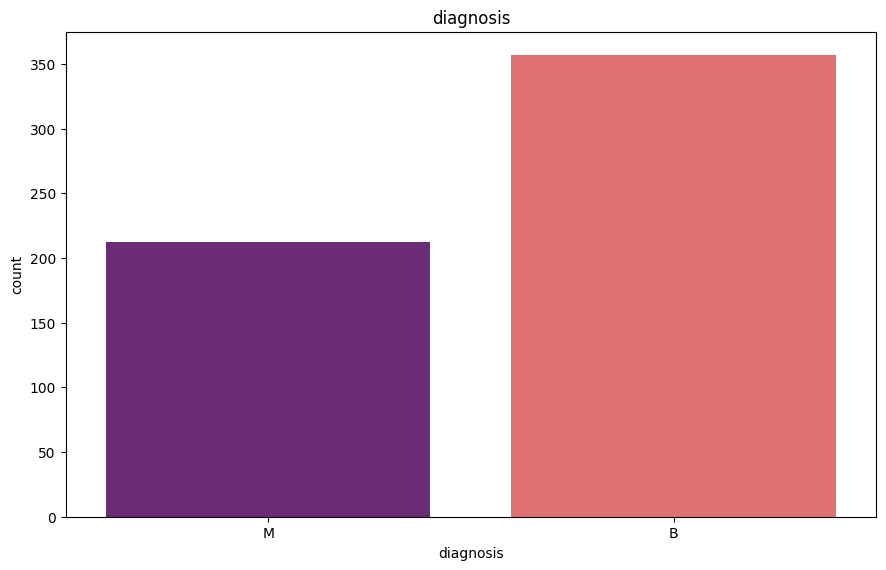

In [197]:
plt.figure(figsize=(25,25),layout='constrained')
for i in range(len(str_columns)):
    plt.subplot(5,3,i+1)
    sns.countplot(data=df,x=str_columns[i],palette='magma',)
    plt.title(str_columns[i])
plt.show()

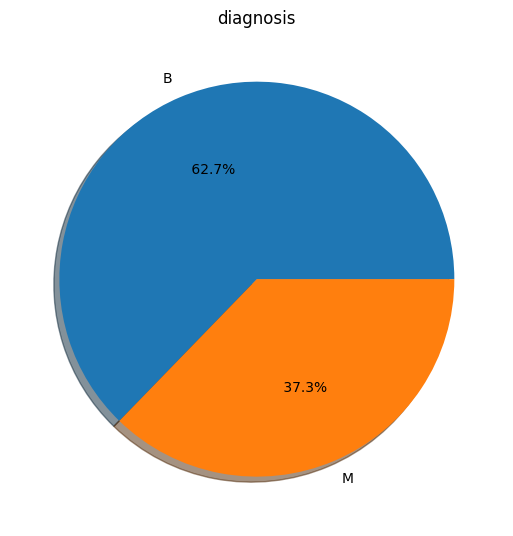

In [198]:
plt.figure(figsize=(25,25),layout='constrained')
for i in range(len(str_columns)):
    plt.subplot(5,3,i+1)
    a=df[str_columns[i]].value_counts()
    lbl=a.index
    plt.pie(x=a,labels=lbl,autopct="% .1f%%",shadow=True)
    plt.title(str_columns[i])
plt.show()

In [199]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [200]:
str_columns
from sklearn.preprocessing import LabelEncoder

# create a LabelEncoder object
le = LabelEncoder()

# iterate over all columns in the DataFrame
for column in str_columns:
        # fit and transform the column with the LabelEncoder object
        df[column] = le.fit_transform(df[column])


In [201]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


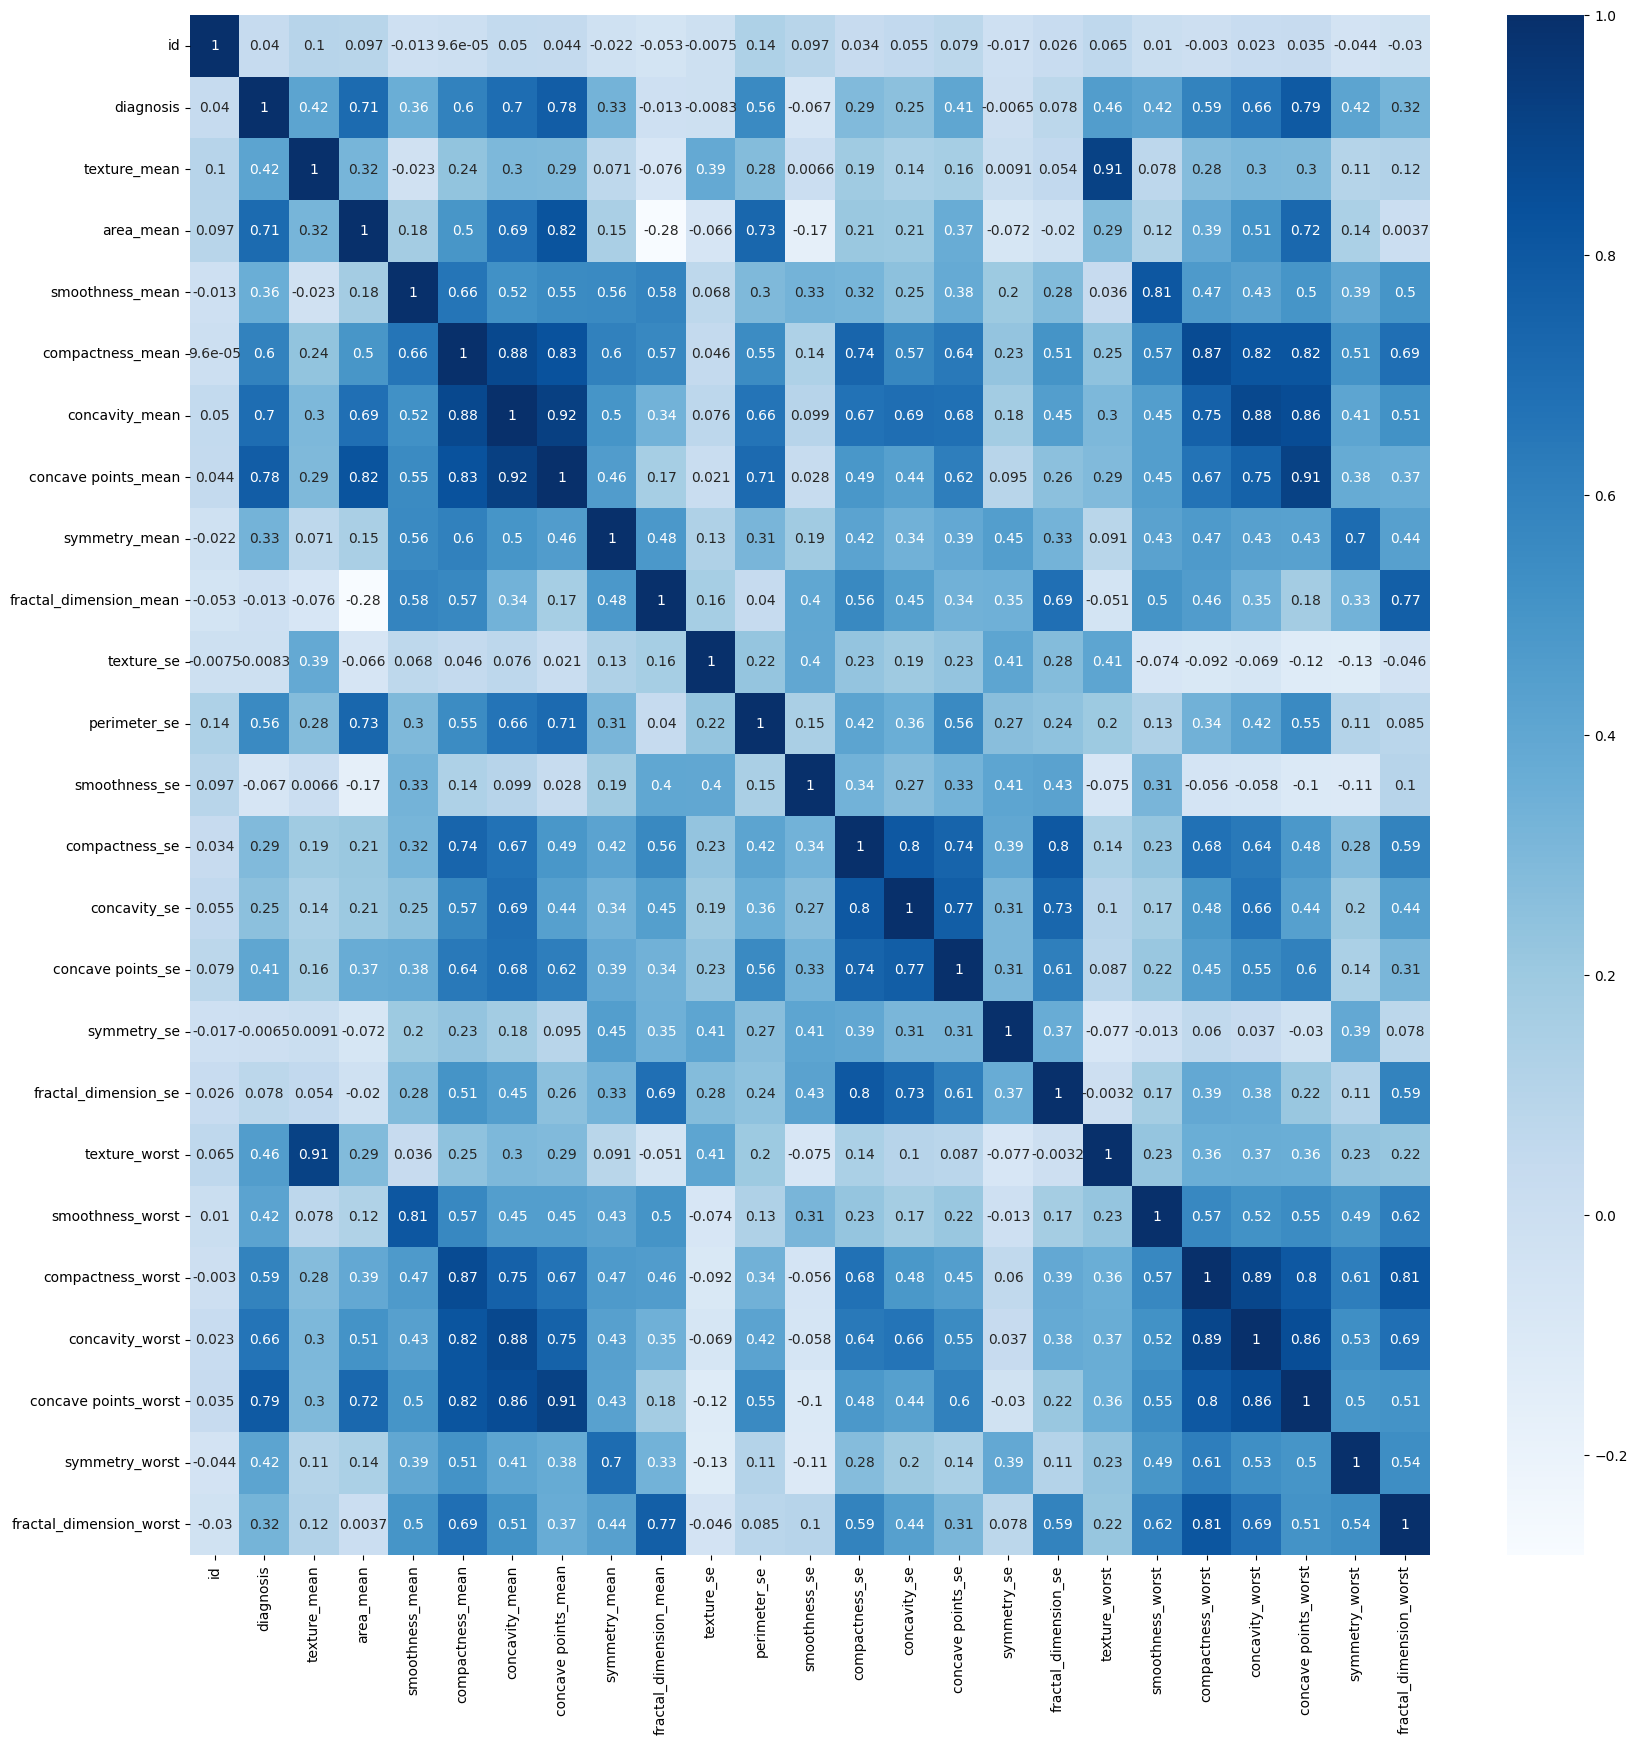

In [203]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')
plt.show()

In [158]:
def check_no(df):
    new = df.corr()
    z = {}
    for col in new.columns:
        for row in new.index:
            if new.loc[row, col] > 0.95 and row != col:
                if col not in z:
                    z[col] = [row]
                else:
                    z[col].append(row)
    return z


In [202]:
check_corr_morethan_95=check_no(df)
check_corr_morethan_95

df.drop(columns=['radius_mean',
  'perimeter_mean',
  'radius_worst',
  'perimeter_worst',],inplace=True)
df.drop(columns=['area_worst','radius_se','area_se'],inplace=True)


In [205]:
X=df.iloc[:,2:]
X
Y=df.iloc[:,1]
Y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [206]:
from sklearn.preprocessing import MinMaxScaler

# create a LabelEncoder object
scaler = MinMaxScaler()

X = scaler.fit_transform(X)


In [210]:
print('X_Shape',X.shape)
print('Y_Shape',Y.shape)

X_Shape (569, 23)
Y_Shape (569,)


In [212]:
Y=Y.astype('int')

In [213]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [214]:
print('x_train',x_train.shape)
print('x_test',x_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

x_train (398, 23)
x_test (171, 23)
y_train (398,)
y_test (171,)


In [227]:
# Logistic Regreesion Model
def model_log_reg(x_train,x_test,y_train,y_test):
    global acc_lr,f1_lr
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)

    conf_lr=confusion_matrix(y_test,y_pred)
    acc_lr=accuracy_score(y_test,y_pred)
    f1_lr=f1_score(y_test,y_pred)
    clf_lr=classification_report(y_test,y_pred)

    print('*********** Logistic Regression***********')
    print('\n')
    print('Accuracy : ',acc_lr)
    print('F1 Score : ',f1_lr)
    print(10*' ')
    print('Confusion Matrix :\n',conf_lr)
    print(10*' ')
    print('Classification Report :\n',clf_lr)
    print(10*' ')

In [228]:
# KNN
def model_KNN(x_train,x_test,y_train,y_test):
    global acc_knn,f1_knn
    KNN=KNeighborsClassifier()
    KNN.fit(x_train,y_train)
    y_pred=KNN.predict(x_test)

    conf_lr=confusion_matrix(y_test,y_pred)
    acc_knn=accuracy_score(y_test,y_pred)
    f1_knn=f1_score(y_test,y_pred)
    clf_lr=classification_report(y_test,y_pred)

    print('*********** KNeighbors_Classifier***********')
    print('\n')
    print('Accuracy : ',acc_knn)
    print('F1 Score : ',f1_knn)
    print(10*' ')
    print('Confusion Matrix :\n',conf_lr)
    print(10*' ')
    print('Classification Report :\n',clf_lr)
    print(10*' ')

In [229]:
# Random Forest
def model_RF(x_train,x_test,y_train,y_test):
    global acc_rf,f1_rf
    RF=RandomForestClassifier()
    RF.fit(x_train,y_train)
    y_pred=RF.predict(x_test)

    conf_lr=confusion_matrix(y_test,y_pred)
    acc_rf=accuracy_score(y_test,y_pred)
    f1_rf=f1_score(y_test,y_pred)
    clf_lr=classification_report(y_test,y_pred)

    print('*********** Random Forest***********')
    print('\n')
    print('Accuracy : ',acc_rf)
    print('F1 Score : ',f1_rf)
    print(10*' ')
    print('Confusion Matrix :\n',conf_lr)
    print(10*' ')
    print('Classification Report :\n',clf_lr)
    print(10*' ')

In [230]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report


model_log_reg(x_train,x_test,y_train,y_test)
model_KNN(x_train,x_test,y_train,y_test)
model_RF(x_train,x_test,y_train,y_test)

*********** Logistic Regression***********


Accuracy :  0.9532163742690059
F1 Score :  0.9333333333333333
          
Confusion Matrix :
 [[107   1]
 [  7  56]]
          
Classification Report :
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       108
           1       0.98      0.89      0.93        63

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171

          
*********** KNeighbors_Classifier***********


Accuracy :  0.9590643274853801
F1 Score :  0.944
          
Confusion Matrix :
 [[105   3]
 [  4  59]]
          
Classification Report :
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       108
           1       0.95      0.94      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighte

In [220]:
tbl=pd.DataFrame()
tbl['Model']=pd.Series(['Logistic Regreesion','KNN','Random Forest'])
tbl['Accuracy']=pd.Series([acc_lr,acc_knn,acc_rf])
tbl['F1_Score']=pd.Series([f1_lr,f1_knn,f1_rf])
tbl.set_index('Model')

,Accuracy,F1_Score
Model,,
Logistic Regreesion,0.953216,0.933333
KNN,0.959064,0.944000
Random Forest,0.959064,0.942149


In [221]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [225]:
# defining the classifier
model = RandomForestClassifier(random_state=1)
# creating a dic for the grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, None],
    'max_features': ['sqrt', 'log2']
}

# defining the CV
cv = StratifiedKFold(n_splits=5)
# initializing the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1,cv=cv,scoring='f1_weighted')
# estimator===model used(random forest,Linear etc)
# para=parameters used 
# cv=StratifiedKFold(n_splits=5)
# scoring='f1_weighted'
# training the model on grid search for hyperparameter tuning of Adaboost
grid_result = grid_search.fit(x_train,y_train)

# finding the best results /hyperparameter tuning of Adaboost
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.954567 using {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 50}


In [223]:
# Logistic Regreesion Model

lr=LogisticRegression(C=10,penalty='l2')
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

conf_lr=confusion_matrix(y_test,y_pred)
acc_lr=accuracy_score(y_test,y_pred)
f1_lr=f1_score(y_test,y_pred)
clf_lr=classification_report(y_test,y_pred)

print('*********** Logistic Regression***********')
print('\n')
print('Accuracy : ',acc_lr)
print('F1 Score : ',f1_lr)
print(10*' ')
print('Confusion Matrix :\n',conf_lr)
print(10*' ')
print('Classification Report :\n',clf_lr)
print(10*' ')

*********** Logistic Regression***********


Accuracy :  0.9590643274853801
F1 Score :  0.943089430894309
          
Confusion Matrix :
 [[106   2]
 [  5  58]]
          
Classification Report :
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       108
           1       0.97      0.92      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

          


In [224]:
ab= LogisticRegression(C=10,penalty='l2')
cv=StratifiedKFold(n_splits=5)
n_scores=cross_val_score(ab,x_train,y_train,scoring='accuracy',cv=cv,n_jobs=-1)
y_pred=cross_val_predict(ab,x_train,y_train,cv=cv)


acc_tst=accuracy_score(y_train,y_pred)


print('***********RandomForestClassifier***********')
print('\n')
print('Testing Accuracy Score : ',acc_tst)

***********RandomForestClassifier***********


Testing Accuracy Score :  0.957286432160804
